In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [2]:

# Read the dataset
kpop_top1000_tracks = pd.read_csv("kpop_top1000_tracks.csv")

# Drop unnecessary columns (e.g., song_name, album_name, etc.)
kpop_top1000_tracks = kpop_top1000_tracks.drop(['song_name', 'album_name', 'album_link', 'artist_name', 'song_link'], axis=1)

# Convert categorical data to numerical using label encoding (explicit column)
label_encoder = LabelEncoder()
kpop_top1000_tracks['explicit'] = label_encoder.fit_transform(kpop_top1000_tracks['explicit'])

# Convert the 'release_date' column to a datetime object for further processing
kpop_top1000_tracks['release_date'] = pd.to_datetime(kpop_top1000_tracks['release_date'], errors='coerce')

# Extract the year, month, and day of the week from the 'release_date' column
kpop_top1000_tracks['release_year'] = kpop_top1000_tracks['release_date'].dt.year
kpop_top1000_tracks['release_month'] = kpop_top1000_tracks['release_date'].dt.month
kpop_top1000_tracks['release_dayofweek'] = kpop_top1000_tracks['release_date'].dt.dayofweek

# Drop the original 'release_date' column and any rows with invalid date values (NaT)
kpop_top1000_tracks = kpop_top1000_tracks.drop(['release_date'], axis=1).dropna()

# Split the data into features (X) and target (y)
features = ['duration_ms', 'explicit', 'release_year', 'release_month', 'release_dayofweek']
target = 'popularity'

X = kpop_top1000_tracks[features]
y = kpop_top1000_tracks[target]

# Standardize the numerical features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Please enter the following details for the new song:

Predicted Popularity: 1


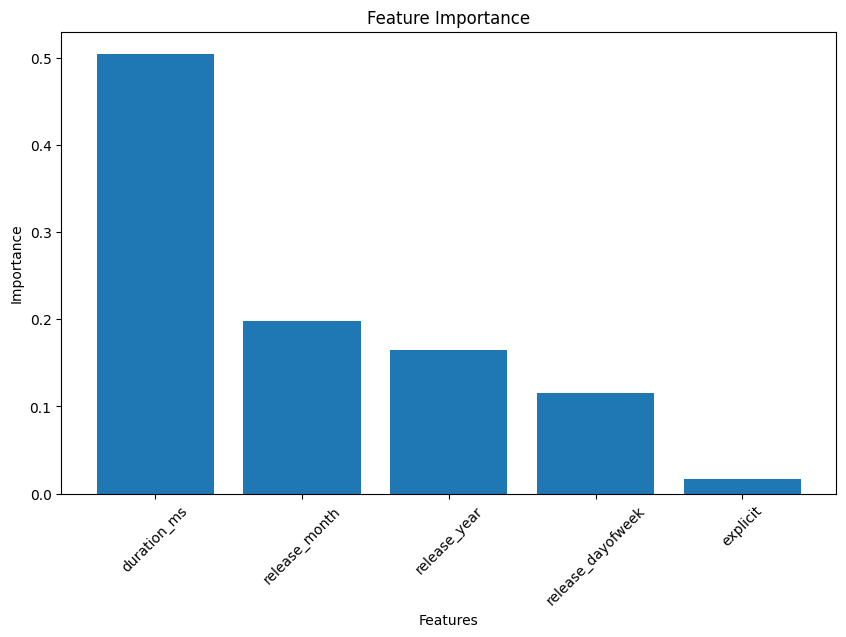

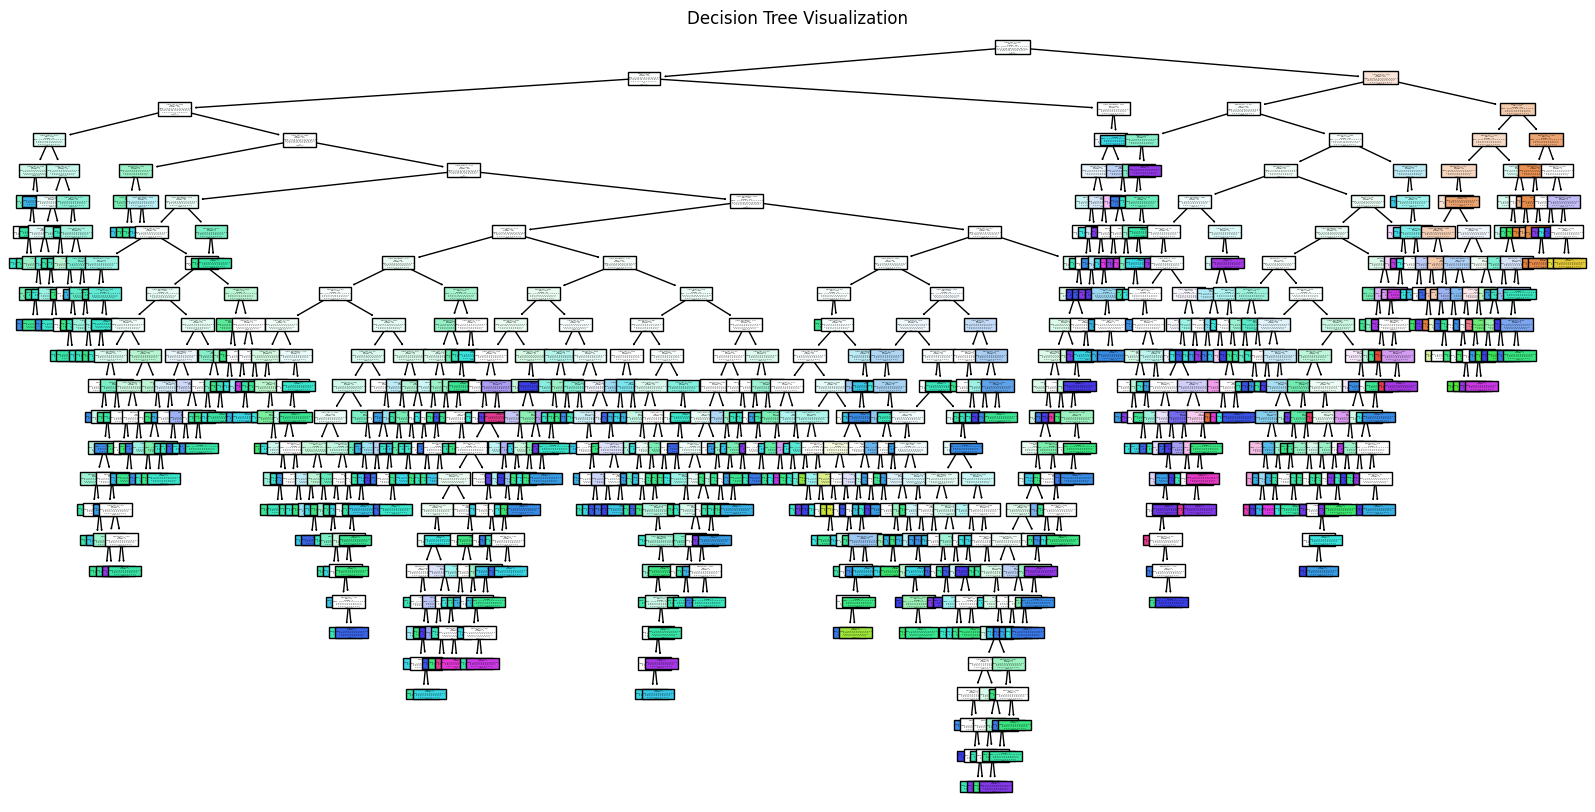

In [3]:

# Train the RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_scaled, y)

# Input the features of a new song from the user
print("Please enter the following details for the new song:")
duration_ms = int(input("Song duration in milliseconds: "))
explicit = int(input("Is the song explicit? (0 for not explicit, 1 for explicit): "))
release_year = int(input("Year of song release: "))
release_month = int(input("Month of song release (1-12): "))
release_dayofweek = int(input("Day of the week of song release (0: Monday, 1: Tuesday, ..., 6: Sunday): "))

# Convert the new song features to a DataFrame and standardize
new_song_features = {
    'duration_ms': duration_ms,
    'explicit': explicit,
    'release_year': release_year,
    'release_month': release_month,
    'release_dayofweek': release_dayofweek
}

new_song_df = pd.DataFrame([new_song_features])
new_song_scaled = scaler.transform(new_song_df)

# Predict the popularity of the new song
predicted_popularity = rf_classifier.predict(new_song_scaled)[0]

print("\nPredicted Popularity:", predicted_popularity)

# Visualize feature importance
feature_importance = pd.Series(rf_classifier.feature_importances_, index=features)
feature_importance = feature_importance.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(feature_importance.index, feature_importance.values)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.show()

# Visualize one of the decision trees
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], feature_names=features, filled=True, class_names=rf_classifier.classes_.astype(str))
plt.title("Decision Tree Visualization")
plt.show()

In [4]:

# Read the dataset (replace "kpop_top1000_tracks.csv" with your actual file path)
kpop_top1000_tracks = pd.read_csv("kpop_top1000_tracks.csv")

# Define the features (input attributes) and target variable (output)
features = ['duration_ms', 'explicit']
target = 'popularity'

# Preprocess the data
# Drop non-numeric and non-categorical columns (e.g., song_name, album_name, etc.)
kpop_top1000_tracks = kpop_top1000_tracks.drop(['song_name', 'album_name', 'album_link', 'artist_name', 'release_date', 'song_link'], axis=1)

# Convert categorical data to numerical using label encoding
label_encoder = LabelEncoder()
kpop_top1000_tracks['explicit'] = label_encoder.fit_transform(kpop_top1000_tracks['explicit'])

# Split the data into training and testing sets
X = kpop_top1000_tracks[features]
y = kpop_top1000_tracks[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report (optional, provides more details)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.115
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.94      0.76        17
           1       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         0
          59       0.00      0.00      0.00         1
          60       0.00      0.00      0.00         0
          61       0.14      0.13      0.14        15
          62       0.20      0.14      0.17        21
          63       0.00      0.00      0.00        15
          64       0.06      0.08      0.06        13
          65       0.00      0.00      0.00        16
          66       0.00      0.00      0.00        10
          67       0.00      0.00      0.00         6
          68       0.00      0.00      0.

c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st